In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test
from scrape import read_adps

2022 WR Projections

In [2]:
X_train2022, X_test2022 = train_test('wr', num_years=5, year_for=2022)
xgbPPR_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022')
xgbPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.1018875488805646
======= Fold 1 ========
Our accuracy on the validation set is 3.7921603795941117
======= Fold 2 ========
Our accuracy on the validation set is 3.5251994157398414
======= Fold 3 ========
Our accuracy on the validation set is 3.7052085772722867
======= Fold 4 ========
Our accuracy on the validation set is 3.9901576130619416
Overall accuracy: 3.62292270690975
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)


,name,proj fpts,class,rank,last rank
0,aj-brown,18.050899,0,1,6
1,amonra-stbrown,17.353619,1,2,7
2,justin-jefferson,17.254991,0,3,1
3,ceedee-lamb,17.174812,0,4,5
4,davante-adams,17.010950,0,5,3
5,stefon-diggs,16.667874,0,6,4
6,jamarr-chase,16.464586,0,7,11
7,jaylen-waddle,16.235741,0,8,8
8,tyreek-hill,15.717276,0,9,2
9,devonta-smith,15.040265,0,10,9


======= Fold 0 ========
Our accuracy on the validation set is 3.241655634085767
======= Fold 1 ========
Our accuracy on the validation set is 3.8285108026622696
======= Fold 2 ========
Our accuracy on the validation set is 3.1782054898312073
======= Fold 3 ========
Our accuracy on the validation set is 3.604739566041222
======= Fold 4 ========
Our accuracy on the validation set is 3.9391615149264907
Overall accuracy: 3.5584546015093914
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)


,name,proj fpts,class,rank,last rank
0,jamarr-chase,19.8070,0,1,11
1,cooper-kupp,19.6712,1,2,23
2,tyreek-hill,18.9578,0,3,2
3,garrett-wilson,18.7476,0,4,21
4,aj-brown,18.7456,0,5,6
5,stefon-diggs,18.7230,0,6,4
6,justin-jefferson,18.6236,0,7,1
7,davante-adams,17.9522,0,8,3
8,amonra-stbrown,17.8616,1,9,7
9,deebo-samuel,17.3622,1,10,38


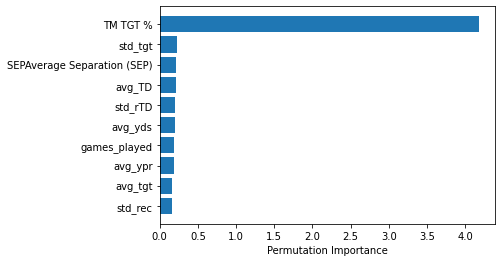

In [3]:
rfPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'rf', pca=False)
rfPPR_results.head(50)

In [4]:
svrPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'svr')
svrPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.5407869029450465
======= Fold 1 ========
Our accuracy on the validation set is 3.7283535346388867
======= Fold 2 ========
Our accuracy on the validation set is 3.529993661360098
======= Fold 3 ========
Our accuracy on the validation set is 3.5592286696129896
======= Fold 4 ========
Our accuracy on the validation set is 3.9750820299981293
Overall accuracy: 3.6666889597110304
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)


,name,proj fpts,class,rank,last rank
0,justin-jefferson,18.581357,0,1,1
1,tyreek-hill,17.600928,0,2,2
2,ceedee-lamb,17.566494,0,3,5
3,davante-adams,17.489721,0,4,3
4,aj-brown,17.403321,0,5,6
5,amonra-stbrown,16.874070,1,6,7
6,stefon-diggs,16.873997,0,7,4
7,jamarr-chase,15.842732,0,8,11
8,dj-moore-wr,15.507898,0,9,24
9,jaylen-waddle,15.365571,0,10,8


In [5]:
X_train2022, X_test2022 = train_test('wr', num_years=5, year_for=2022, scoring='HALF')
xgbHALF_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022', scoring='HALF')
xgbHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.7642603701330617
======= Fold 1 ========
Our accuracy on the validation set is 3.148433071716366
======= Fold 2 ========
Our accuracy on the validation set is 2.7281574166244624
======= Fold 3 ========
Our accuracy on the validation set is 3.154276380876791
======= Fold 4 ========
Our accuracy on the validation set is 2.8952737236080535
Overall accuracy: 2.938080192591747
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)


,name,proj fpts,class,rank,last rank
0,ceedee-lamb,14.538579,0,1,6
1,amonra-stbrown,14.405443,1,2,8
2,justin-jefferson,14.289871,0,3,1
3,aj-brown,14.089893,0,4,5
4,jamarr-chase,13.902299,0,5,12
5,davante-adams,13.863770,0,6,2
6,stefon-diggs,13.457838,0,7,4
7,jaylen-waddle,13.434589,0,8,7
8,devonta-smith,13.234096,0,9,10
9,tyreek-hill,12.927258,0,10,3


======= Fold 0 ========
Our accuracy on the validation set is 2.700944228834192
======= Fold 1 ========
Our accuracy on the validation set is 2.789611054826336
======= Fold 2 ========
Our accuracy on the validation set is 3.0493773516175624
======= Fold 3 ========
Our accuracy on the validation set is 2.82974008174471
======= Fold 4 ========
Our accuracy on the validation set is 2.979967964553888
Overall accuracy: 2.869928136315338
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)


,name,proj fpts,class,rank,last rank
0,cooper-kupp,17.9066,1,1,24
1,jamarr-chase,17.3928,0,2,12
2,amonra-stbrown,17.0054,1,3,8
3,tyreek-hill,16.2896,0,4,3
4,deebo-samuel,16.2530,1,5,38
5,justin-jefferson,16.1246,0,6,1
6,ceedee-lamb,15.7068,0,7,6
7,aj-brown,15.4860,0,8,5
8,stefon-diggs,15.4338,0,9,4
9,chris-godwin,15.3338,2,10,20


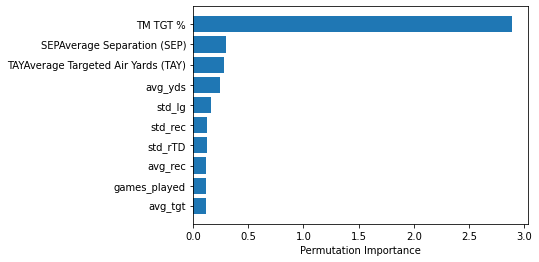

In [6]:
rfHALF_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'rf', pca=False, scoring='HALF')
rfHALF_results.head(50)

In [7]:
svrHALF_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022', model_='svr', scoring='HALF')
svrHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.864893235349776
======= Fold 1 ========
Our accuracy on the validation set is 3.1747731294725408
======= Fold 2 ========
Our accuracy on the validation set is 2.6565570924783133
======= Fold 3 ========
Our accuracy on the validation set is 3.105096153250619
======= Fold 4 ========
Our accuracy on the validation set is 2.8829568412939084
Overall accuracy: 2.9368552903690315
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)


,name,proj fpts,class,rank,last rank
0,justin-jefferson,14.935355,0,1,1
1,ceedee-lamb,14.665818,0,2,6
2,amonra-stbrown,14.621782,1,3,8
3,tyreek-hill,13.830551,0,4,3
4,davante-adams,13.813990,0,5,2
5,stefon-diggs,13.688299,0,6,4
6,aj-brown,13.584371,0,7,5
7,jamarr-chase,13.584309,0,8,12
8,devonta-smith,13.219590,0,9,10
9,cooper-kupp,13.094221,1,10,24


In [8]:
mean_results_PPR = xgbPPR_results.append([rfPPR_results, svrPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_PPR = mean_results_PPR.reset_index(drop=True)
mean_results_PPR['rank'] = mean_results_PPR.index + 1
mean_results_PPR.to_csv('projections/wr_PPR_2022_mean_projections.csv', index = False)
mean_results_PPR.head(50)

,name,proj fpts,rank
0,justin-jefferson,18.153316,1
1,aj-brown,18.066607,2
2,davante-adams,17.484290,3
3,tyreek-hill,17.425335,4
4,stefon-diggs,17.421624,5
5,jamarr-chase,17.371439,6
6,amonra-stbrown,17.363096,7
7,ceedee-lamb,17.302369,8
8,cooper-kupp,16.419904,9
9,jaylen-waddle,16.005904,10


In [9]:
mean_results_HALF = xgbHALF_results.append([rfHALF_results, svrHALF_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_HALF = mean_results_HALF.reset_index(drop=True)
mean_results_HALF['rank'] = mean_results_HALF.index + 1
mean_results_HALF.to_csv('projections/wr_HALF_2022_mean_projections.csv', index = False)
mean_results_HALF.head(50)

,name,proj fpts,rank
0,amonra-stbrown,15.344208,1
1,justin-jefferson,15.116609,2
2,ceedee-lamb,14.970399,3
3,jamarr-chase,14.959803,4
4,cooper-kupp,14.390207,5
5,aj-brown,14.386755,6
6,tyreek-hill,14.349136,7
7,stefon-diggs,14.193313,8
8,davante-adams,13.523853,9
9,devonta-smith,12.996695,10
